In [1]:
name = 'outrage-multi.pkl'

In [89]:
import pickle as pkl
graph = pkl.load(open(f'traces/{name}', 'rb')) 

In [85]:
name = 'outgroup-multi.pkl'
graph = pkl.load(open(f'traces/{name}', 'rb')) 
data = graph

In [93]:
breadth = 5
depth = 30

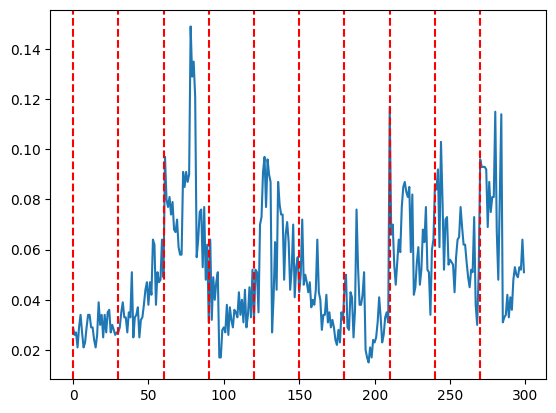

In [94]:
# smooth and plot
import numpy as np
import matplotlib.pyplot as plt

data = np.array(data)
plt.plot(data)
# conv = np.convolve(data, np.ones(15)/15, mode='valid')
# plt.plot(conv)

for i in range(0, len(data), depth):
    plt.axvline(i, color='r', linestyle='--')

plt.show()

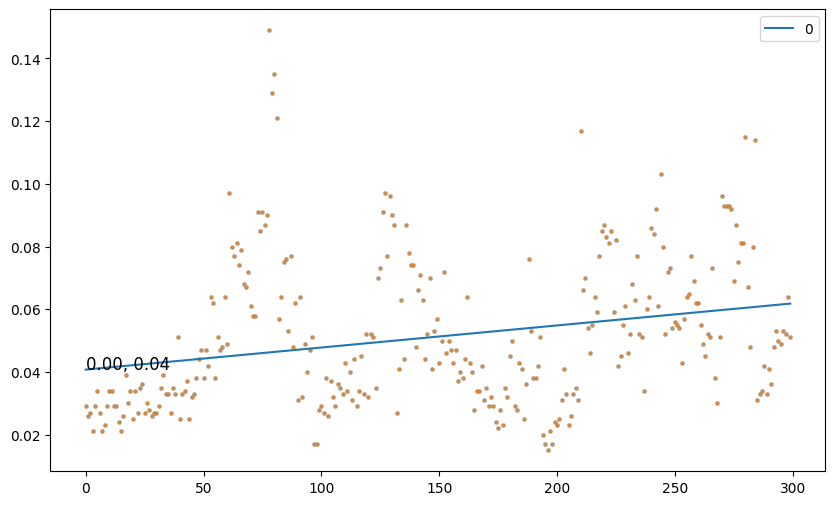

In [92]:
N = len(data)
gradients = []
lines = list(range(0, len(data), N))
# set figure size
plt.figure(figsize=(10, 6))

for i in range(0, len(data), N):
    d = data[i:i+N]
    if len(d) < N:
        continue
    gradient = np.polyfit(range(N), d, 1)
    gradients.append(gradient)
    r = np.polyval(gradient, range(N))
    plt.plot(r, label=str(i))
    # write the name of the line on the plot by the last point
    g1 = '{:.2f}'.format(gradient[0])
    g2 = '{:.2f}'.format(gradient[1])
    g  = f'{g1}, {g2}'
    plt.text(0, r[0], str(g), fontsize=12)
    plt.scatter(range(N), d, s=5, alpha=0.5)

gradient = np.polyfit(range(N), d, 1)
r = np.polyval(gradient, range(N))
plt.scatter(range(N), d, s=5, alpha=0.5)

plt.legend()
plt.show()

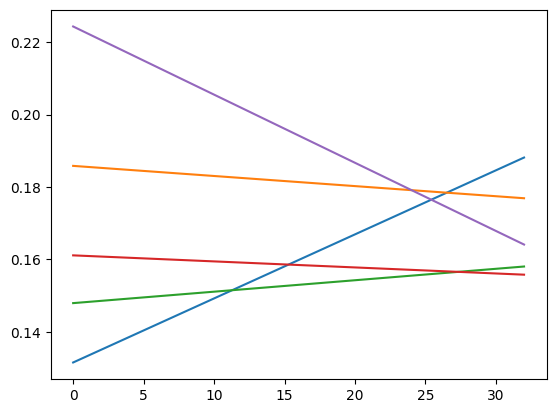

In [68]:
segments = []
for i in range(0, len(data), depth):
    d = data[i:i+depth]
    if len(d) < depth:
        continue
    segments.append(d)
    gradient = np.polyfit(range(depth), d, 1)
    gradients.append(gradient)
    r = np.polyval(gradient, range(depth))
    plt.plot(r, label=str(i))